In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('data.csv')

## Data Cleaning

##### Pada bagian berikut, dilakukan beberapa perubahan serta pengecekan terhadap missing values.

In [2]:
data.head() #cek data.head
#perhatikan bahwa kolom price, bedrooms, bathrooms, floors
#masih dalam bentuk float. Kita harus ubah terlebih dahulu
#menjadi intteger

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
feature = ['price','bedrooms','bathrooms','floors']
data[feature] = data[feature].astype(int)

In [4]:
#kita drop beberapa kolom karena sepertinya tidak diperlukan
dropped = ['date','street','statezip','country']
data.drop(dropped,axis=1,inplace=True)

In [5]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,313000,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,Shoreline
1,2384000,5,2,3650,9050,2,0,4,5,3370,280,1921,0,Seattle
2,342000,3,2,1930,11947,1,0,0,4,1930,0,1966,0,Kent
3,420000,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,Bellevue
4,550000,4,2,1940,10500,1,0,0,4,1140,800,1976,1992,Redmond


In [6]:
data.count()
#mengecek berapa banyak data yang tidak kosong

price            4600
bedrooms         4600
bathrooms        4600
sqft_living      4600
sqft_lot         4600
floors           4600
waterfront       4600
view             4600
condition        4600
sqft_above       4600
sqft_basement    4600
yr_built         4600
yr_renovated     4600
city             4600
dtype: int64

Data di atas sudah lengkap (tidak ada elemen yang kosong), sehingga dapat dilakukan visualisasi.

## Indexing dan Visualisasi

##### Pada bagian berikut, dilakukan indexing untuk memperoleh beberapa bagian penting dari data.

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Dicari jumlah rumah yang dibangun pada tahun tertentu di seluruh USA (yang ter-record).

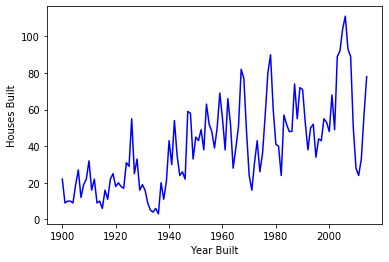

In [110]:
data_year = data['yr_built'].value_counts().reset_index(name='counts')
data_year.columns = ['yr_built','count']

data_year.sort_values('yr_built',inplace=True)
plt.plot(data_year['yr_built'],data_year['count'],'b')
plt.xlabel('Year Built')
plt.ylabel('Houses Built')
plt.show()

Selanjutnya, dicari jumlah rumah pada setiap kota. Ditampilkan hanya 5 besar saja.

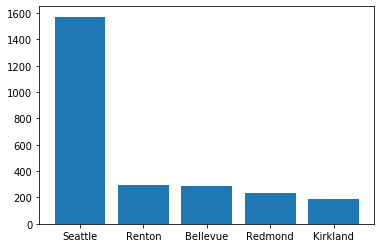

Houses recorded in Seattle :  1573
House price mean in Seattle :  579837.4551811825


In [111]:
data_percity = data['city'].value_counts().reset_index(name='count')
plt.bar(data_percity['index'].head(),data_percity['count'].head())

plt.show()

print('Houses recorded in Seattle : ', data['city'].value_counts()['Seattle'])
print('House price mean in Seattle : ', data.loc[data['city']=='Seattle'].price.mean())

Perhatikan grafik bar di atas, bahwa jumlah rumah di Seattle menduduki perintkat pertama dengan jumlah 1573. Perhatikan juga bahwa rata-rata harga jual rumah di Seattle adalah 579837.455.

Selanjutnya, dicari data statistik pada beberapa kota dengan fungsi describe().

In [112]:
data_stat = data.groupby('city')['price'].describe().reset_index()

data_stat

,city,count,mean,std,min,25%,50%,75%,max
0,Algona,5.0,2.072880e+05,6.479795e+04,100000.0,196440.0,230000.0,248000.00,262000.0
1,Auburn,176.0,2.993404e+05,1.305229e+05,0.0,224000.0,274000.0,333839.50,900000.0
2,Beaux Arts Village,1.0,7.450000e+05,NaN,745000.0,745000.0,745000.0,745000.00,745000.0
3,Bellevue,286.0,8.471807e+05,5.936853e+05,0.0,530625.0,721500.0,999750.00,7062500.0
4,Black Diamond,9.0,3.396056e+05,1.999751e+05,0.0,234950.0,255000.0,510000.00,650000.0
5,Bothell,33.0,4.814419e+05,9.889197e+04,347000.0,420000.0,458000.0,540000.00,749995.0
6,Burien,74.0,3.489472e+05,2.148940e+05,0.0,210250.0,277500.0,432500.00,1035000.0
7,Carnation,22.0,5.087520e+05,3.327109e+05,80000.0,301000.0,432175.0,647000.00,1680000.0
8,Clyde Hill,11.0,1.321945e+06,1.055769e+06,0.0,936000.0,1300000.0,1367200.00,3800000.0
9,Covington,43.0,2.962304e+05,3.096970e+05,0.0,217450.0,249500.0,290500.00,2199900.0


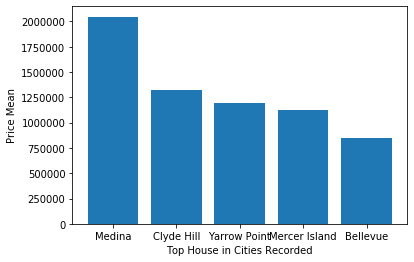

In [113]:
new_data_stat = data_stat[['city','mean']].sort_values(by=['mean','city'],ascending=False).head()

plt.bar(new_data_stat['city'],new_data_stat['mean'])
plt.xlabel('Top House in Cities Recorded')
plt.ylabel('Price Mean')
plt.show()

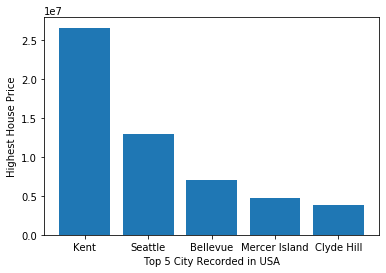

In [114]:
max_data_stat = data_stat[['city','max']].sort_values(by=['max','city'],ascending=False).head()

plt.bar(max_data_stat['city'],max_data_stat['max'])
plt.xlabel('Top 5 City Recorded in USA')
plt.ylabel('Highest House Price')
plt.show()

Perhatikan bahwa harga rata-rata rumah di Seattle bukan yang tertinggi, padahal jumlah rumah di Seattle (berdasarkan record) merupakan yang tertinggi. Selanjutnya, dicari nilai standar deviasi harga rumah di Seattle.

In [115]:
print('nilai standar deviasi harga rumah di Seattle :', data.loc[data['city']=='Seattle'].price.std())

nilai standar deviasi harga rumah di Seattle : 462738.2536086837


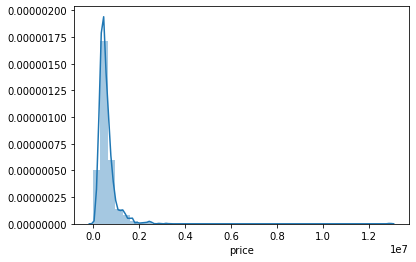

In [116]:
import seaborn as sns
data_seattle = data.loc[data['city']=='Seattle']
sns.distplot(data_seattle.price,bins=40)
plt.show()

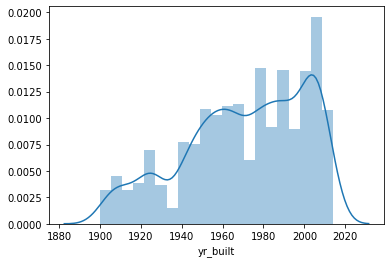

In [122]:
sns.distplot(data['yr_built'])

## Korelasi

##### Pada bagian berikut, dilakukan visualisasi nilai korelasi antar variabel.

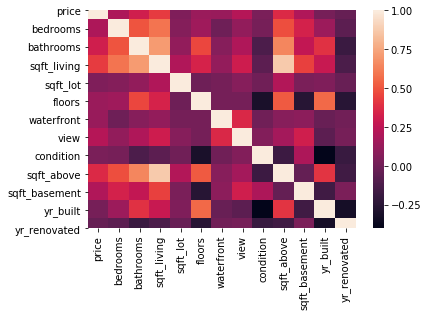

In [70]:
#Menampilkan nilai Korelasi antarvariabel
data_cor = data.corr()

sns.heatmap(data_cor)
plt.show()

## Price Prediction

##### Dilakukan prediksi harga menggunakan scikit-learn.

In [68]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement']

X = data[features]
y = data.price

In [77]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

regressor = DecisionTreeRegressor(random_state=1)

regressor.fit(X,y)

predict = regressor.predict(X)

print(mean_absolute_error(y,predict))

58.65891304347826


Pada awal dataset, diketahui bahwa data yang terekam adalah data seluruh USA di berbagai kota. Akan tetapi, jumlah data rumah tiap kotanya tidak lengkap bahkan terdapat kota yang hanya memiliki 1 atau 2 rumah terekam. Dengan begitu, prediksi yang dilakukan tidak akan akurat.